### Dataset
- Nesse trabalho vamos explorar algumas bases de dados variadas
- Como irei abordar formas de pré-processamento foram necessários diferentes tipos de dados

### Objetivo Geral
- Trabalhar com Pré-processamento de dados e Pipelines

### Objetivos Específicos
- Tratamento de variáveis categóricas - Encoding
- Como lidar com alguns tipos de Missing Data
- Como estruturar uma Pipeline
- Padronização de Dados e seus impactos na eficiência dos modelos

### Fonte
- Projeto pessoal com os assuntos abordados no módulo: <br>
    'Supervised Learning with scikit-learn - Preprocessing and pipelines', da plataforma DataCamp, trilha 'Machine Learning Scientist with Python'

# Importando Bibliotecas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Split
from sklearn.model_selection import train_test_split

# Pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Modelos
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Gapminder Dataset

# Compreensão Base
- Vou dar maior atenção aos tipos de pré-processamento
### Visualização Inicial

In [2]:
# Importando Base
gapminder_df = pd.read_csv('datacamp_workspace_export_2022-03-29 11_09_13.csv')
gapminder_df = gapminder_df.drop('index', axis = 1)
display(gapminder_df)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


- Precisaremos tratar uma coluna não numérica, 'Region'
- Normalmente Scikit-learn não aceita features categóricas, é necessário uma etapa de encode

### Análise Inicial

In [3]:
gapminder_df.isnull().sum().sort_values(ascending = False)

Region             0
child_mortality    0
life               0
BMI_female         0
GDP                0
BMI_male           0
CO2                0
HIV                0
fertility          0
population         0
dtype: int64

In [4]:
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    int64  
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    int64  
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


- Aparentemente não existem dados nulos
- A coluna 'Region' precisa ser transformada em uma coluna numérica

# Exploratory Data Analysis (EDA)

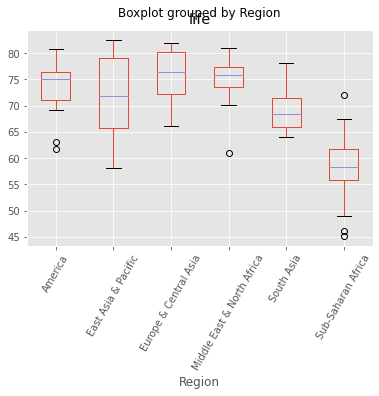

In [5]:
# Boxplot
gapminder_df.boxplot('life', 'Region', rot=60)

# Plot
plt.show()

# Preprocessing
### Encoding
- Esse tipo de pré-processamento é utilizado quando estamos trabalhando com colunas textuais
- O processo de encoding cria para cada categoria da coluna textual uma nova coluna, veja:
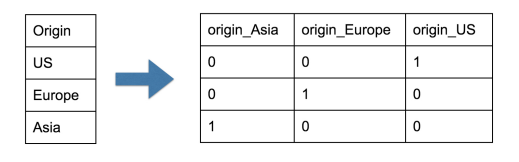
- É necessário tomar cuidado quando temos muitas categorias! Isso implica na criação de muitas outras colunas... Isso pode ser prejudicial para o modelo (pode deixar ele lento por exemplo)
- Opções para diminuirmos o número de categorias:
    1. Excluir a primeira coluna com o parâmetro 'drop_first'
    
    Ela é considerada 'informação repetida', se classificamos as amostras com todas as categorias menos uma, então os pontos amostrais que não foram classificados em nenhuma categoria são extamente dessa categoria que foi excluída! Sabemos implicitamente seus valores, sendo assim uma 'informação repetida'. Veja:
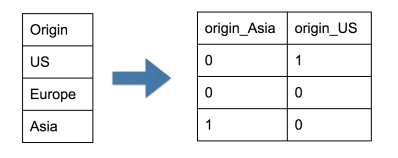

    2. Agrupar categorias com poucas aparições em 'Outras'
    
    Nessa abordagem vamos diminuir o número de categorias juntando aparições pouco relevantes em uma nova categoria
    
    
- Para realizar o processo de encoding temos 2 opções mais comuns:
    1. scikit-learn: OneHotEncoder()
    2. pandas: get_dummies()
    
    
- Como ja estamos trabalhando com a biblioteca pandas usarei o comando 'get_dummies()'

In [6]:
# Dummy variables
df_region1 = pd.get_dummies(gapminder_df)

print(df_region1.columns)

# Dummy variables descartando a primeira coluna
df_region2 = pd.get_dummies(gapminder_df, drop_first=True)

print(df_region2.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


- Observe o parâmetro 'drop_first'
- Quando fazemos o encoding de uma coluna categórica com por exemplo 4 categorias, nesse caso seriam criadas 4 outras colunas pela função 'get_dummies'. Mas pense comigo, uma dessas colunas é desnecessária. Quando você sabe que existem 4 opções e sei que uma categoria não é nenhuma das outras 3, então ela só poderia ser a 4! Nesse caso não é necessário passar as 4 colunas de encoding, por isso excluímos 1 delas pois não traz informações novas para nossa base

In [7]:
coluna_excluida = df_region1.columns.difference(df_region2.columns)
coluna_excluida

Index(['Region_America'], dtype='object')

- Veja que a coluna excluída foi a 'Region_America'

# Treinamento Modelo

- Separando as valores independentes em X e o target em y

In [8]:
df = df_region2.copy()

X = df.drop('life', axis = 1)
y = df['life']

- Como só fizemos o processo de encoding não há problemas em fazer o pré-processamento antes de separar os dados em treino e teste (Considerando que nunca vamos ter outra classe nova da coluna 'Region')

In [9]:
# Gerando Modelo
ridge = Ridge(alpha = 0.5, normalize = True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

ridge.fit(X_train, y_train)

print(ridge.score(X_test, y_test))

# Cross-validation
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# Cross-validated scores
print(ridge_cv)

0.8345330688799243
[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


# Voting Dataset
# Compreensão Base
- Vou dar maior atenção em quais tipos de pré-processamento são necessários
### Visualização Inicial

In [10]:
# Importando Base
votes = pd.read_csv('datacamp_workspace_export_2022-03-29 12_16_04.csv')
display(votes)

,index,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


- Precisaremos trabalhar com a substituição de caractéres especiais '?'
- Precisaremos redefinir a classificação y/n para numérica 1/0

### Análise Inicial

In [11]:
votes.isnull().sum().sort_values(ascending = False)

eaa_rsa              0
satellite            0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
aid                  0
duty_free_exports    0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
index                0
dtype: int64

- Aparentemente não há dados vazios, mas sabemos que alguns valores estão como '?'
- Veja, por exemplo, na coluna 'education'

In [12]:
votes['education'].value_counts()

n    233
y    171
?     31
Name: education, dtype: int64

- Existem várias formas de mascarar 'missing values'. Podemos colocá-los como números absurdos como 9999 ou mesmo 0 em categorias em que seria impossível ter esse valor, como por exemplo peso. Outros algarismos podem fazer esse papel como #, @, $ e vários outros 

# Preprocessing

### Missing Data
- Um ponto que não dei tanta atenção em trabalhos passados foi em relação a missing data
- Normalmente sempre avaliei quando haviam fatores não preenchidos (null values / nan)
- Porém essa não é a única forma de se mostrar valores faltando, eles podem estar mascarados!
- Uma possibilidade é possuírem valor 0 quando na verdade essa medida seria impossível, como por exemplo: Idade, peso, altura etc.
- Vamos agora explorar mais afundo sobre esse tema e como agir em determinadas situações

- Claramente existem 2 problemas:
    1. Apesar de não termos valores faltantes temos valores representados por '?'
    2. As informações 'n' e 'y' precisam ser transformadas em informações numéricas

In [13]:
votes1 = votes.copy()

In [14]:
# Substituindo os '?' por NaN
votes1[votes1 == '?'] = np.nan

In [15]:
votes1

,index,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


- Veja que o caractér '?' está como NaN

In [16]:
votes1.isnull().sum().sort_values(ascending = False)

eaa_rsa              104
water                 48
education             31
duty_free_exports     28
superfund             25
missile               22
synfuels              21
crime                 17
salvador              15
aid                   15
satellite             14
infants               12
religious             11
physician             11
budget                11
immigration            7
index                  0
dtype: int64

- Temos vários valores faltantes agora
- Como tratá-los?
- Uma alternativa é excluir esses valores, vamos avaliar esse caminho

In [17]:
votes1.shape

(435, 17)

In [18]:
votes1 = votes1.dropna()

In [19]:
votes1.shape

(232, 17)

- Observe que ao excluir as linhas que continham valores 'NaN' perdemos uma parcela expressiva dos nossos dados
- Isso é um grande problema, precisamos de outro caminho, vamos avaliar isso posteriormente

In [20]:
votes

,index,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


### Encoding
- Transformar y/n em 1/0

In [21]:
# Precisamos fazer o encoding
for coluna in votes.columns:
    votes.loc[votes[coluna]=='y', coluna] = 1
    votes.loc[votes[coluna]=='n', coluna] = 0

In [22]:
votes[votes == '?'] = np.nan

In [23]:
votes

,index,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,republican,0,NaN,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,republican,0,0,0,1,1,1,NaN,NaN,NaN,NaN,0,1,1,1,0,1


# Exploratoty Data Analysis (EDA)
- Vamos avaliar especificamente 3 colunas:
    1. Education
    2. Crime
    3. Religious

Queremos ver as diferenças de comportamento entre os dois partidos

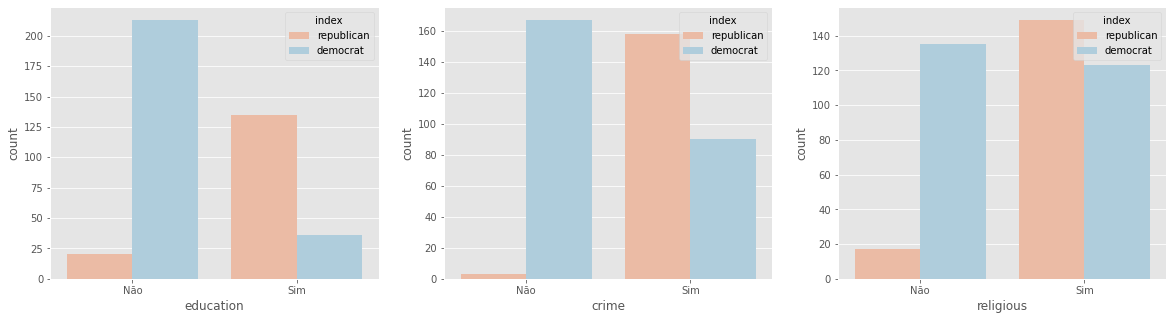

In [24]:
plt.figure(figsize = (20,5))
x = ['education', 'crime', 'religious']
for i, nome in enumerate(x):
    plt.subplot(1,3,i+1)
    sns.countplot(x=nome, hue='index', data=votes, palette='RdBu')

    # Mudando a legenda do eixo x
    # O parâmetro [0,1] é a posição da legenda 'Não' e 'Sim'
    plt.xticks([0,1], ['Não', 'Sim'])

plt.show()

- No geral os republicanos são mais homogêneos quando vão votar, não foi observado votos divididos entre os partidos
- No caso dos democratas, tanto no segundo como no terceiro gráfico houve muitos votos tanto positivos como negativos. 
- Dessa forma, seria possível supor que dentro dos democratas ainda existe muitas diferenças de opiniões na hora de votar 

# Imputing missing data in a ML Pipeline

### Pipeline
- https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca#
- Sequência de passos que tem como objeto organizar as etapas em um modelo de machine learning

- Vamos avaliar uma forma de preencher os valores 'NaN'
- Uma alternativa é preencher com a média

In [25]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')

In [26]:
X = votes.drop('index', axis = 1)
y = votes['index']

In [27]:
X1 = X.copy()
imp1.fit(X1)

SimpleImputer()

In [28]:
X1 = imp1.transform(X1)

In [29]:
X1

array([[0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.81268882],
       [0.44208038, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.50387597, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.42751843,
        0.        ]])

- Veja que para treinar o modelo antes precisamos tratar os dados!
- Os dados foram preenchidos com a média
- Mas como estamos trabalhando com valores 0 e 1 talvez essa não seja a melhor saída
- Vamos agora substituir com o valor mais frequente

In [30]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [31]:
X2 = X.copy()
imp2.fit(X2)

SimpleImputer(strategy='most_frequent')

In [32]:
X2 = imp2.transform(X2)

In [33]:
X2

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=object)

- Veja que agora só temos valores 0 e 1, o que faz mais sentido para esse caso
- E se nós conseguíssemos 'imbutir' essa etapa de tratamento dentro do nosso modelo?
- É exatamente isso que vamos tentar fazer!

# Pìpeline

In [34]:
# Criando o modelo
logreg = LogisticRegression()

# Definindo uma sequência lógica
# Primeiro substituímos todos os valores np.nan pela média --> comando imp
# Segundo fazemos a regressão logística
# Steps representa essa sequência de açoes
steps = [('imputation', imp2),
         ('logistic_regression', logreg)]

# Definimos nossa Pipeline com essa sequência de ações
pipeline = Pipeline(steps)

# Separamos os dados
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Usamos a pipeline exatamente como se fosse um modelo de Machine Learning que importamos
# Treinamos o modelo
pipeline.fit(X_train, y_train)

# Previsão com dados nunca vistos
y_pred = pipeline.predict(X_test)

# Métrica
pipeline.score(X_test, y_test)

0.9618320610687023

# Wine Dataset
# Compreensão Base

In [35]:
wine_df = pd.read_csv('datacamp_workspace_export_2022-03-29 17_20_37.csv')
wine_df = wine_df.drop('index', axis = 1)
display(wine_df)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Aparentemente só temos colunas numéricas
### Análise Inicial

In [36]:
wine_df.isnull().sum().sort_values(ascending = False)

diabetes       0
age            0
dpf            0
bmi            0
insulin        0
triceps        0
diastolic      0
glucose        0
pregnancies    0
dtype: int64

- Apesar de não haver valores vazios, existem valores nulos
- Valores '0' nas colunas 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age' são equivalentes a valores nulos

# Preprocessing

### Missing Data

In [37]:
colunas = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']
wine_df[wine_df[colunas] == 0] = np.nan
wine_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### Método 'replace'
- Forma mais técnica de fazer a substituição

In [38]:
# Outra forma de substituir os valores em 0 por NaN seria usando o comando 'replace'

#df.insulin.replace(0, np.nan, inplace=True)
#df.triceps.replace(0, np.nan, inplace=True)
#df.bmi.replace(0, np.nan, inplace=True)

# Dessa forma os valores dessas 3 colunas seriam substituidos
# O parâmetro 'inplace' = True aplica diretamente na base a substituição modificando os dados

In [39]:
X = wine_df.drop('diabetes', axis= 1)
y = wine_df['diabetes']

### Missing Data

In [40]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

- Pronto, agora todos os valores foram corrigidos pela média

# Imputing Scalling data in a ML Pipeline

# Scaling the Data
- Dados em escalas muito diferentes podem ter um impacto negativo no treino dos nossos modelos
- Corrigimos isso através de métodos como padronização e normalização

In [41]:
X_scaled = scale(X)

In [42]:
print(np.mean(X))
print(np.std(X))

56.10110842140057
61.90166864136243


In [43]:
np.mean(X_scaled), np.std(X_scaled)

(1.9038590148845458e-16, 1.0)

- Através do método 'scale' deixamos todos os dados com média 0 e desvio padrão 1
- O comando 'scale' e o comando 'StandardScaler' fazem essencialmente a mesma operação

In [44]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)
                  
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.7207792207792207

In [45]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.6623376623376623

- Vemos um resultado melhor para os dados com escala padronizada

# Pipeline = Scalling + Hyperparameter tuning
### Modelo SVM - SVC

In [46]:
# Definir Pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Especificar intervalo dos hiperparametros
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# GridSearchCV
cv = GridSearchCV(pipeline, param_grid = parameters)

# Treinar modelo
cv.fit(X_train, y_train)

# Previsão
y_pred = cv.predict(X_test)

# Métricas
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        94
           1       0.76      0.48      0.59        60

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


# Pipeline = Missing Data + Scalling + Hyperparameter tuning
### Importando Novamente a Base

In [47]:
wine_df = pd.read_csv('datacamp_workspace_export_2022-03-29 17_20_37.csv')
wine_df = wine_df.drop('index', axis = 1)
display(wine_df)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Correção dos Valores 0 para NaN

In [48]:
colunas = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']
wine_df[wine_df[colunas] == 0] = np.nan
wine_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### Definindo Pipeline Completa

In [49]:
# Definir Pipeline
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Especificar intervalo dos hiperparametros
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# GridSearchCV
cv = GridSearchCV(pipeline, param_grid = parameters)

# Treinar modelo
cv.fit(X_train, y_train)

# Previsão
y_pred = cv.predict(X_test)

# Métricas
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        94
           1       0.76      0.48      0.59        60

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


- Veja que o resultado obtido foi exatamente o mesmo que fazendo a etapa do 'SimpleImputer' separada 

# Conclusão
- Foram exploradas várias formas de pré-processamento
    1. Colunas Categóricas: Normalmente é necessário transformar em informações testuais
    2. Missing Data: Analisamos várias formas de identificar esse tidpo de dado, através de caractéres especiais, valores absurdos ou até mesmo de maneira mais direta quando identificando o valor como NaN
    3. Scalling: Em muitos modelos a escala das features importa, caso as escalas entre as features sejam muito distintas isso deve ser corrigido
- Também foi possível estudar de maneiras mais aprofundada como funciona a construção de pipelines, facilitando o workflow do modelo. Foi realizado pipelines incorporando desde o preenchimento de valores vazios e correção da escala até o treinamento do modelo associado ao processo de Hyperparameter tuning 
- Em todos os casos o pré-processamento teve impacto positivo nas métricas analisadas, mostrando assim sua importância